In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import cv2

from pipeline import process_images

In [14]:
PATH_GPU = "/home/pgliwny/computer_vision_project/data"
PATH_ADATA = "../prepare_images/data"
H5_PATH = os.path.join(PATH_ADATA, "webcam_images_good.h5")

In [15]:
! ls ../prepare_images/data/

crossings_points.pkl  webcam_images_good.h5  webcam_images.h5


In [60]:
f = h5py.File("../prepare_images/data/webcam_images_good.h5", 'r') 

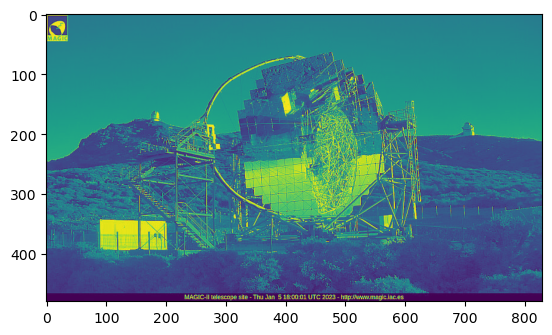

In [23]:
plt.imshow(f["images"]['entry_0000']["image"][:])

In [88]:
def get_mirror_images(h5_path, mirror_id, N=5):
    with h5py.File(H5_PATH, 'r') as f:
        image_group = f["images"]
        w, h = f["images"]['entry_0001']['mirrors'][f'mirror_{mirror_id}'][:].shape
        img_array = np.zeros((N, w, h))
        for i, entry_name in enumerate(list(image_group.keys())[:N]):
            m_img = f["images"][entry_name]['mirrors'][f'mirror_{mirror_id}'][:]
            img_array[i, :, :] = m_img
    return img_array

In [89]:
m_130_images = get_mirror_images(H5_PATH, 130, N=9)
m_172_images = get_mirror_images(H5_PATH, 172, N=9)

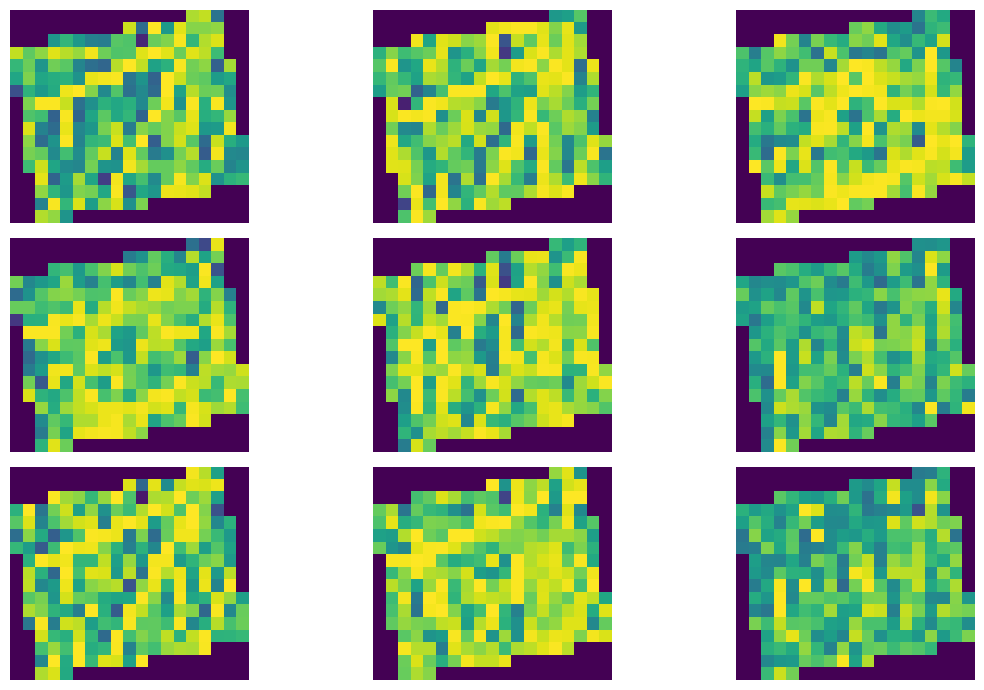

In [90]:
fig, ax = plt.subplots(3, 3, figsize=(12, 7))
ax = ax.flatten()

for i in range(9):
    ax[i].imshow(m_130_images[i, :, :])
    ax[i].axis("off")

plt.tight_layout()
plt.show()

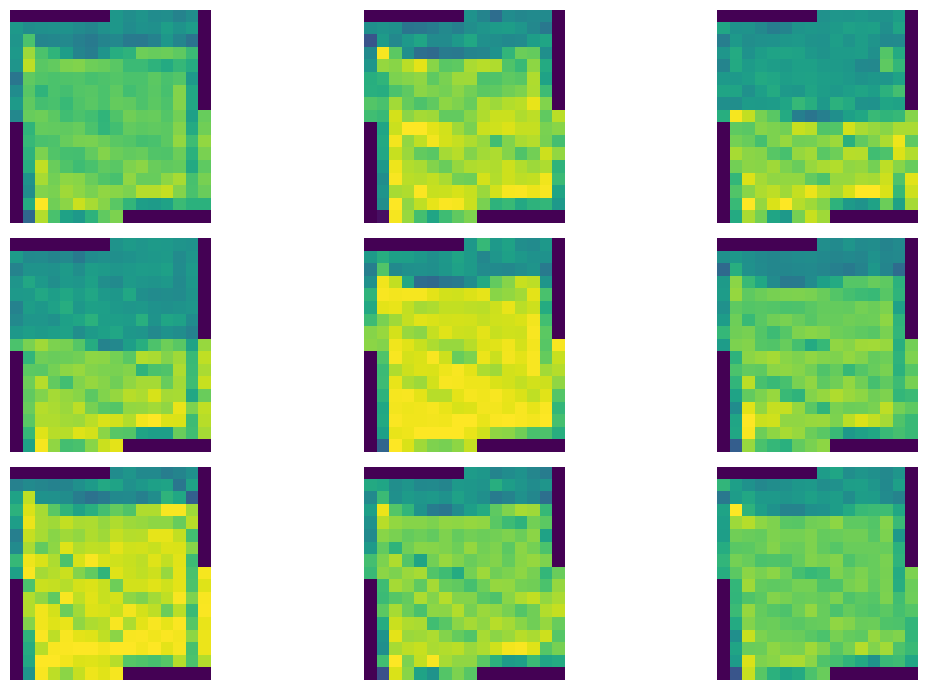

In [91]:
fig, ax = plt.subplots(3, 3, figsize=(12, 7))
ax = ax.flatten()

for i in range(9):
    ax[i].imshow(m_172_images[i, :, :])
    ax[i].axis("off")

plt.tight_layout()
plt.show()

In [92]:
m_172_images.shape

(9, 17, 16)